Data: https://www.kaggle.com/mustfkeskin/turkish-movie-sentiment-analysis-dataset/code

In [69]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-e85f8ac8-83fd-f2d6-7ffb-2671f4409588)


In [70]:
import pandas as pd

df = pd.read_csv("data/magaza_yorumlari_duygu_analizi.csv", encoding="utf-16")
df.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz


In [71]:
df.Durum.value_counts()

Olumlu      4253
Olumsuz     4238
Tarafsız    2938
Name: Durum, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429 entries, 0 to 11428
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Görüş   11426 non-null  object
 1   Durum   11429 non-null  object
dtypes: object(2)
memory usage: 178.7+ KB


In [73]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11426 entries, 0 to 11428
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Görüş   11426 non-null  object
 1   Durum   11426 non-null  object
dtypes: object(2)
memory usage: 267.8+ KB


## Preprocess

In [74]:
df.Görüş[0]

"ses kalitesi ve ergonomisi rezalet, sony olduğu için aldım ama 4'de 1 fiyatına çin replika ürün alsaydım çok çok daha iyiydi, kesinlikle tavsiye etmiyorum."

### Preprocessing guide:

* 1: Organize the dataset and comment column
* 2: Drop film_name column
* 3: Change point column's rows to integers
* 4: Remove punctuation (comment column) and lower the inputs
* 5: Remove stopwords and make sentences lower(comment column)
* 6: Stemming (comment column)

### Remove punctuation

In [75]:
df['Görüş'] = df['Görüş'].str.replace(r'[^\w\s]+', '')
df.Görüş[0]

'ses kalitesi ve ergonomisi rezalet sony olduğu için aldım ama 4de 1 fiyatına çin replika ürün alsaydım çok çok daha iyiydi kesinlikle tavsiye etmiyorum'

### Lower the inputs

In [76]:
df["Görüş"] = df["Görüş"].str.lower()
df.head()

,Görüş,Durum
0,ses kalitesi ve ergonomisi rezalet sony olduğu...,Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süpergece çalıştır sıkıntı yokkablo ...,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,kulaklığın sesi kaliteli falan değil aleti öve...,Olumsuz


### Stopwords

In [77]:
# Import the nltk library and download stopwords
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
# Get the stopwords
from nltk.corpus import stopwords

stop_words = stopwords.words("turkish")
stop_words[:10]

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz']

In [79]:
# Remove stopwords from each line and check the lines
#stop_words = set(stop_words)
#df['Görüş'] = df['Görüş'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#
#df.Görüş[0]

### Stemmer

In [81]:
# Import the library and get the stemmer for Turkish Language
from TurkishStemmer import TurkishStemmer

stemmer = TurkishStemmer()

In [82]:
# To use stemmer on each word, turn each line into a list
#df['Görüş'] = df['Görüş'].str.split()
#df.head()

In [83]:
# Apply stemmer
#df['Görüş'] = df['Görüş'].apply(lambda x: [stemmer.stem(y) for y in x])
#
#df.head()

In [84]:
df.Görüş[0]

'ses kalitesi ve ergonomisi rezalet sony olduğu için aldım ama 4de 1 fiyatına çin replika ürün alsaydım çok çok daha iyiydi kesinlikle tavsiye etmiyorum'

In [85]:
# Turn back each line to a string (from list)
#df['Görüş'] = df['Görüş'].apply(lambda x: ' '.join(word for word in x))
#
#df.head()

In [86]:
# Get train sentences from df.comment
train_sentences = df["Görüş"].tolist()

train_sentences[0]

'ses kalitesi ve ergonomisi rezalet sony olduğu için aldım ama 4de 1 fiyatına çin replika ürün alsaydım çok çok daha iyiydi kesinlikle tavsiye etmiyorum'

In [87]:
df = df.sample(frac=1)
df.head()

,Görüş,Durum
7060,kargo hızlıydıürün kullanışlı ve ücretine göre...,Tarafsız
6747,yüksek performans beklemeyin evde internet öde...,Tarafsız
10998,kargo fırmaları yüzünde biçok kez siparışı ipt...,Tarafsız
7549,fiyat performans çok dengeli üründen memnumun ...,Olumlu
1801,hayır beğenmedim deforma olan ürünleri gönder...,Olumsuz


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11426 entries, 7060 to 3752
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Görüş   11426 non-null  object
 1   Durum   11426 non-null  object
dtypes: object(2)
memory usage: 267.8+ KB


In [89]:
# Get the average and the max length of the inputs
import numpy as np

sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
max_sent_len = np.max(sent_lens)
avg_sent_len, max_sent_len

(21.72378785226676, 422)

In [90]:
# How long of a sentence lenght covers 95% of examples?
output_seq_len = int(np.percentile(sent_lens, 95))

output_seq_len

64

In [91]:
# How long of a sentence lenght covers 97% of examples?
x = int(np.percentile(sent_lens, 97))

x

78

In [92]:
# How long of a sentence lenght covers 99% of examples?
x = int(np.percentile(sent_lens, 99))

x

120

In [27]:
# Setting it 160 instead of 159 since 160 is divisible to 8.
output_seq_len = 120

In [93]:
# Import AutoTokenizer
from transformers import AutoTokenizer
# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-128k-uncased")

### Test the tokizer on a sample sentence 

In [94]:
# Convert tokens to ids
sample_sentence = "Bu film berbat. Cidden en kötü film ama izlenir yine de"
sample_tokenized_sentence = tokenizer.tokenize(sample_sentence)
sample_tokenized_sentence

['bu',
 'film',
 'berbat',
 '.',
 'cidden',
 'en',
 'kotu',
 'film',
 'ama',
 'izlenir',
 'yine',
 'de']

In [95]:
# Convert ids to tokens
sample_ids = tokenizer.convert_tokens_to_ids(sample_tokenized_sentence)
sample_ids

[1964, 2767, 13686, 18, 17081, 2064, 36007, 2767, 2156, 41667, 3000, 1961]

In [96]:
sample_encoded_sentence = tokenizer.encode_plus(
    text=sample_sentence, 
    add_special_tokens=True,
    max_length=32,
    truncation=True,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors="np"
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [97]:
# Get keys for the sample encoded sentence
sample_encoded_sentence.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [98]:
sample_input_ids = sample_encoded_sentence["input_ids"]
sample_attention_mask = sample_encoded_sentence["attention_mask"]

In [99]:
sample_input_ids[:1]

array([[    2,  1964,  2767, 13686,    18, 17081,  2064, 36007,  2767,
         2156, 41667,  3000,  1961,     3,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]])

In [100]:
tokenizer.convert_ids_to_tokens(sample_input_ids[0])

['[CLS]',
 'bu',
 'film',
 'berbat',
 '.',
 'cidden',
 'en',
 'kotu',
 'film',
 'ama',
 'izlenir',
 'yine',
 'de',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11426 entries, 3382 to 4293
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Görüş   11426 non-null  object
 1   Durum   11426 non-null  object
dtypes: object(2)
memory usage: 267.8+ KB


In [101]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11426 entries, 7060 to 3752
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Görüş   11426 non-null  object
 1   Durum   11426 non-null  object
dtypes: object(2)
memory usage: 267.8+ KB


## Encode inputs

After experimenting the encoding operation on the sample sentence, now we're ready to encode our inputs (tf.comments)

In [39]:
#df.comment.tolist()

In [102]:
import tensorflow as tf

input_ids = []
attention_mask = []

for txt in df.Görüş.values:
    encoded = tokenizer.encode_plus(
        text=txt, # the sentence to be encoded 
        add_special_tokens=True, # Add [CLS] and [SEP]
        max_length=120, # max length of a sentence
        truncation=True, # truncate if sentence length is bigger than max_length
        pad_to_max_length=True, # Add [PAD]s
        return_attention_mask=True, # Generate attention mask
        return_tensors="tf" # return TensorFlow tensors
    )

    # Append input_ids and attention_masks to their own lists
    input_ids.append(encoded["input_ids"])
    attention_mask.append(encoded["attention_mask"])

# Concatenate
input_ids = tf.concat(input_ids, 0)
attention_mask = tf.concat(attention_mask, 0)

print("Original: ", df.Görüş.values[0])
print("Token IDs: ", input_ids[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  kargo hızlıydıürün kullanışlı ve ücretine göre güzelürünün
paketlenmesi gelişi güzel bir şekilde yapılmıştıo kadar özendiydi ki
süt kutusu ile paketlemişti
Token IDs:  tf.Tensor(
[     2   7061 119514  32480   3868  16285   1022   1946  45298   2004
  22586  14368  32480   1941  91446  31009   1010  14368   1947  18011
   2658  92227   1008   2185  10785  61706   8637   2354  20753  13383
   2037  88660  34737      3      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0 

In [103]:
# Convert tokens to ids to check
tokenizer.convert_ids_to_tokens(input_ids[0])

['[CLS]',
 'kargo',
 'hızlıydı',
 '##urun',
 'kullanı',
 '##sl',
 '##ı',
 've',
 'ucret',
 '##ine',
 'gore',
 'guzel',
 '##urun',
 '##un',
 'paketlenmesi',
 'gelis',
 '##i',
 'guzel',
 'bir',
 'sekilde',
 'yapıl',
 '##mıstı',
 '##o',
 'kadar',
 'oz',
 '##endi',
 '##ydi',
 'ki',
 'sut',
 'kutusu',
 'ile',
 'paketle',
 '##misti',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',


In [104]:
# Check input_ids and shape of input_ids
input_ids, input_ids.shape

(<tf.Tensor: shape=(11426, 120), dtype=int32, numpy=
 array([[     2,   7061, 119514, ...,      0,      0,      0],
        [     2,  42064,   5308, ...,      0,      0,      0],
        [     2,   7061,   3151, ...,      0,      0,      0],
        ...,
        [     2, 106798,  48790, ...,      0,      0,      0],
        [     2,  36664,   2789, ...,      0,      0,      0],
        [     2,  26965,   2821, ...,      0,      0,      0]], dtype=int32)>,
 TensorShape([11426, 120]))

In [105]:
# Check attention_mask and shape of attention_mask
attention_mask, attention_mask.shape

(<tf.Tensor: shape=(11426, 120), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>, TensorShape([11426, 120]))

In [106]:
attention_mask[1], attention_mask[1].shape

(<tf.Tensor: shape=(120,), dtype=int32, numpy=
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>, TensorShape([120]))

## One-hot-encode labels    

In [107]:
df.head()

,Görüş,Durum
7060,kargo hızlıydıürün kullanışlı ve ücretine göre...,Tarafsız
6747,yüksek performans beklemeyin evde internet öde...,Tarafsız
10998,kargo fırmaları yüzünde biçok kez siparışı ipt...,Tarafsız
7549,fiyat performans çok dengeli üründen memnumun ...,Olumlu
1801,hayır beğenmedim deforma olan ürünleri gönder...,Olumsuz


In [110]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
labels_one_hot = one_hot_encoder.fit_transform(df["Durum"].to_numpy().reshape(-1,1))
labels_one_hot

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [111]:
dataset = tf.data.Dataset.from_tensor_slices((input_ids, attention_mask, labels_one_hot))
dataset.take(1)

<TakeDataset shapes: ((120,), (120,), (3,)), types: (tf.int32, tf.int32, tf.float64)>

In [112]:
def map_func(input_ids, masks, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {"input_ids": input_ids,
            "attention_mask": masks}, labels

In [113]:
dataset = dataset.map(map_func)
dataset.take(1)

<TakeDataset shapes: ({input_ids: (120,), attention_mask: (120,)}, (3,)), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.float64)>

In [114]:
from tensorflow.keras.optimizers.schedules import PolynomialDecay

x = len(dataset)*0.85

num_epochs = 3
num_train_steps = x * num_epochs
lr_scheduler = PolynomialDecay(
    initial_learning_rate=5e-5,
    end_learning_rate=0.,
    decay_steps=num_train_steps
)

In [115]:
batch_size=32
dataset = dataset.shuffle(10000).batch(batch_size, drop_remainder=True)

dataset.take(1)

<TakeDataset shapes: ({input_ids: (32, 120), attention_mask: (32, 120)}, (32, 3)), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.float64)>

In [116]:
input_ids[0], input_ids[0].shape

(<tf.Tensor: shape=(120,), dtype=int32, numpy=
 array([     2,   7061, 119514,  32480,   3868,  16285,   1022,   1946,
         45298,   2004,  22586,  14368,  32480,   1941,  91446,  31009,
          1010,  14368,   1947,  18011,   2658,  92227,   1008,   2185,
         10785,  61706,   8637,   2354,  20753,  13383,   2037,  88660,
         34737,      3,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,  

In [117]:
split = 0.85
size = int((input_ids.shape[0] / batch_size) * split)
size

303

In [118]:
train_ds = dataset.take(size)
val_ds = dataset.skip(size)

len(dataset), len(train_ds), len(val_ds)

(357, 303, 54)

In [119]:
from transformers import TFAutoModel
from transformers import BertTokenizer

bert128k = TFAutoModel.from_pretrained("dbmdz/bert-base-turkish-128k-uncased")
#bert = TFAutoModel.from_pretrained("dbmdz/bert-base-turkish-uncased")
#distilbert = TFAutoModel.from_pretrained("dbmdz/distilbert-base-turkish-cased")

Some layers from the model checkpoint at dbmdz/bert-base-turkish-128k-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at dbmdz/bert-base-turkish-128k-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [120]:
import tensorflow as tf

# two input layers, we ensure layer name variables match to dictionary keys in TF dataset
input_ids = tf.keras.layers.Input(shape=(120,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(120,), name='attention_mask', dtype='int32')

# we access the transformer model within our bert object using the bert attribute (eg bert.bert instead of bert)
embeddings = bert128k.bert(input_ids, attention_mask=mask)[1]  # access final activations (already max-pooled) [1]
# convert bert embeddings into 6 output classes
#x = tf.keras.layers.Dropout(0.1)(embeddings)
x = tf.keras.layers.Dense(1024, activation='relu')(embeddings)
outputs = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(x)

# model
model = tf.keras.Model(inputs=[input_ids, mask], outputs=outputs)

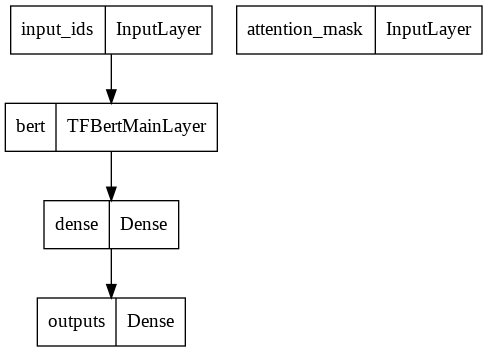

In [61]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=False)

In [121]:
#model.layers[2].trainable=False
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 120)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 120)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  184345344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 120,                                         

In [122]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_scheduler) # lr=2e-5, decay=1e-6
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, 
              loss=loss, 
              metrics=[acc])

In [123]:
train_ds, val_ds

(<TakeDataset shapes: ({input_ids: (32, 120), attention_mask: (32, 120)}, (32, 3)), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.float64)>,
 <SkipDataset shapes: ({input_ids: (32, 120), attention_mask: (32, 120)}, (32, 3)), types: ({input_ids: tf.int32, attention_mask: tf.int32}, tf.float64)>)

In [124]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=4,
    verbose=1
)

Epoch 1/4
303/303 [==============================] - 614s 2s/step - loss: 0.7592 - accuracy: 0.6597 - val_loss: 0.5551 - val_accuracy: 0.7795
Epoch 2/4
303/303 [==============================] - 601s 2s/step - loss: 0.5781 - accuracy: 0.7693 - val_loss: 0.4422 - val_accuracy: 0.8287
Epoch 3/4
303/303 [==============================] - 604s 2s/step - loss: 0.4791 - accuracy: 0.8108 - val_loss: 0.3461 - val_accuracy: 0.8675
Epoch 4/4
303/303 [==============================] - 611s 2s/step - loss: 0.3728 - accuracy: 0.8614 - val_loss: 0.2483 - val_accuracy: 0.9219
